In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_cross_check/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_cross_check.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_WireModYZ.root'

tree_name = 'numuCCAna'
sample_name = 'WireModYZ'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	96450
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.19653398031e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.12186975105e+20  Scale:  0.0681362519386
Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0638845208392
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out33.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	90451
Overlay: Number of Entries:	96446
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


weight_name = 'EventWeight*TunedCentralValue_Genie'


In [11]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Normalization (data)/(mc +ext) =  0.999179126602
Normalization (data)/(mc +ext) =  0.999179071043
Normalization (data)/(mc +ext) =  0.999179079283
Normalization (data)/(mc +ext) =  1.03618585809
Normalization (data)/(mc +ext) =  0.999178571383
Normalization (data)/(mc +ext) =  0.999179048422


0.9991790484216811

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/NuVx_sce_cut_CV.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/NuVx_sce_cut_CV.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/NuVy_sce_cut_CV.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/NuVy_sce_cut_CV.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in

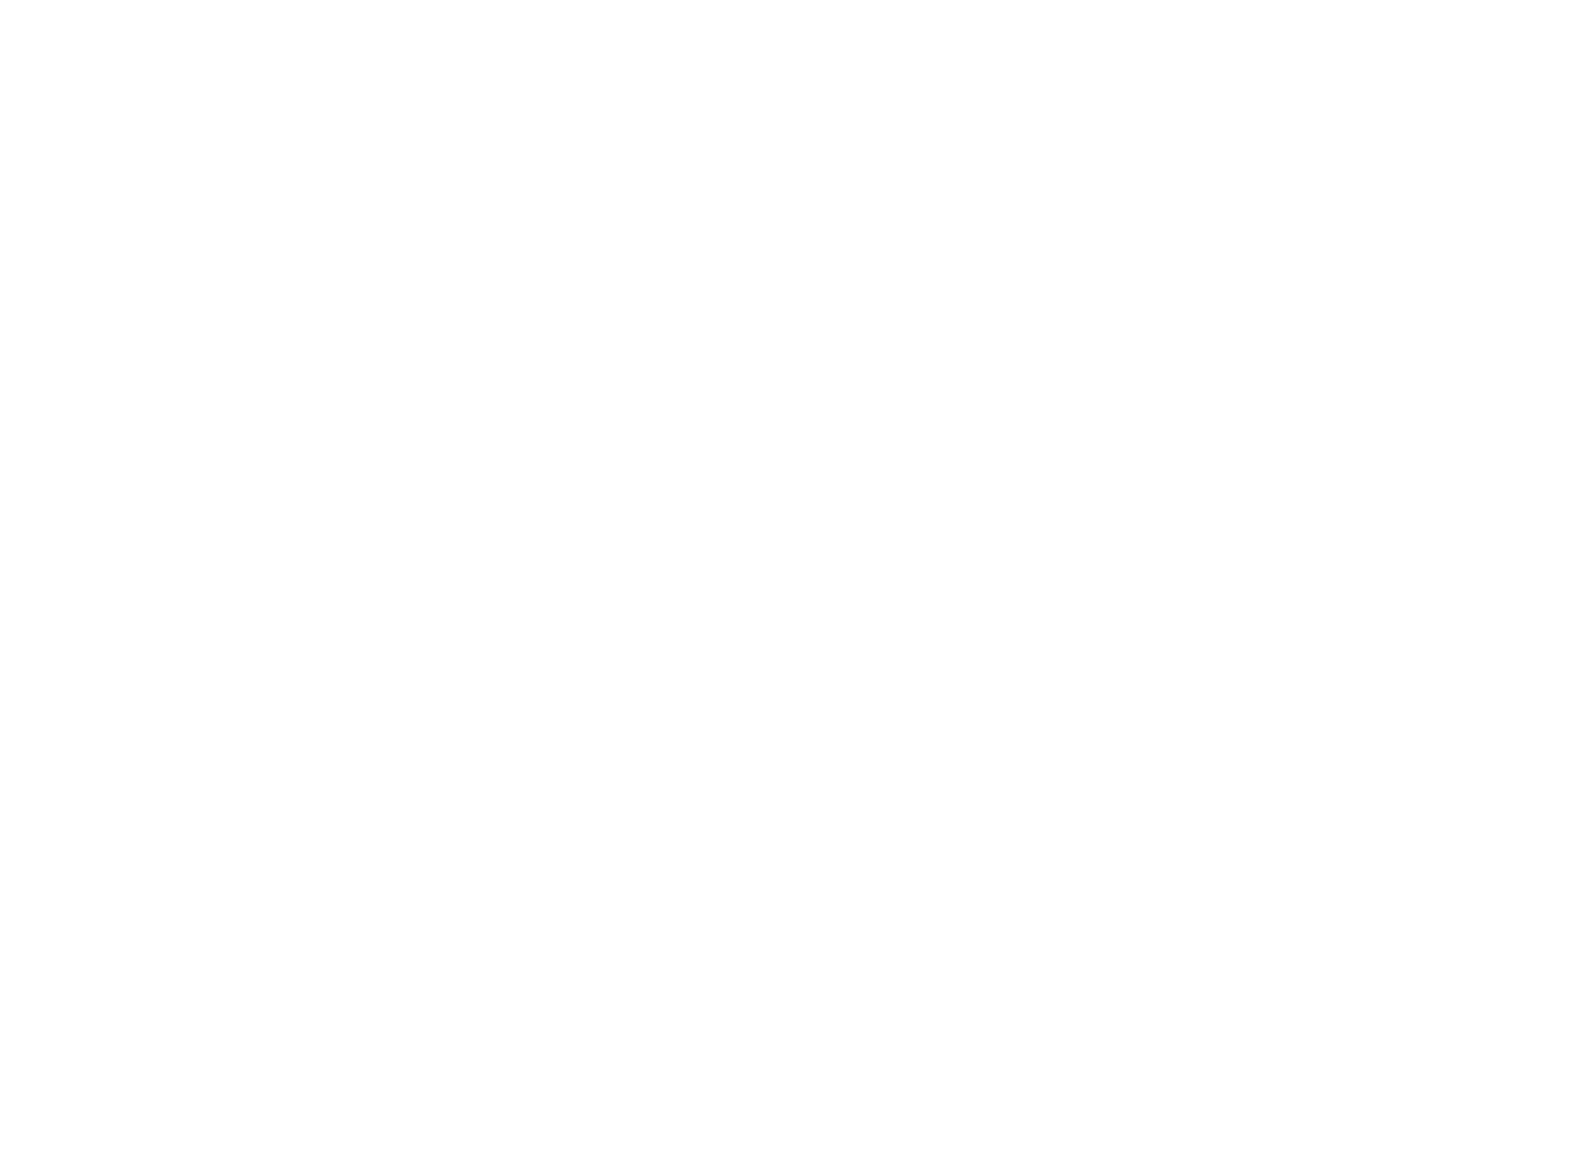

In [13]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_cut_CV'
side_right = 'right'
side_left = 'left'
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,'phi'+name,side_left)

In [15]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_TrackMom_WireModYZ.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_TrackMom_WireModYZ.root has been created


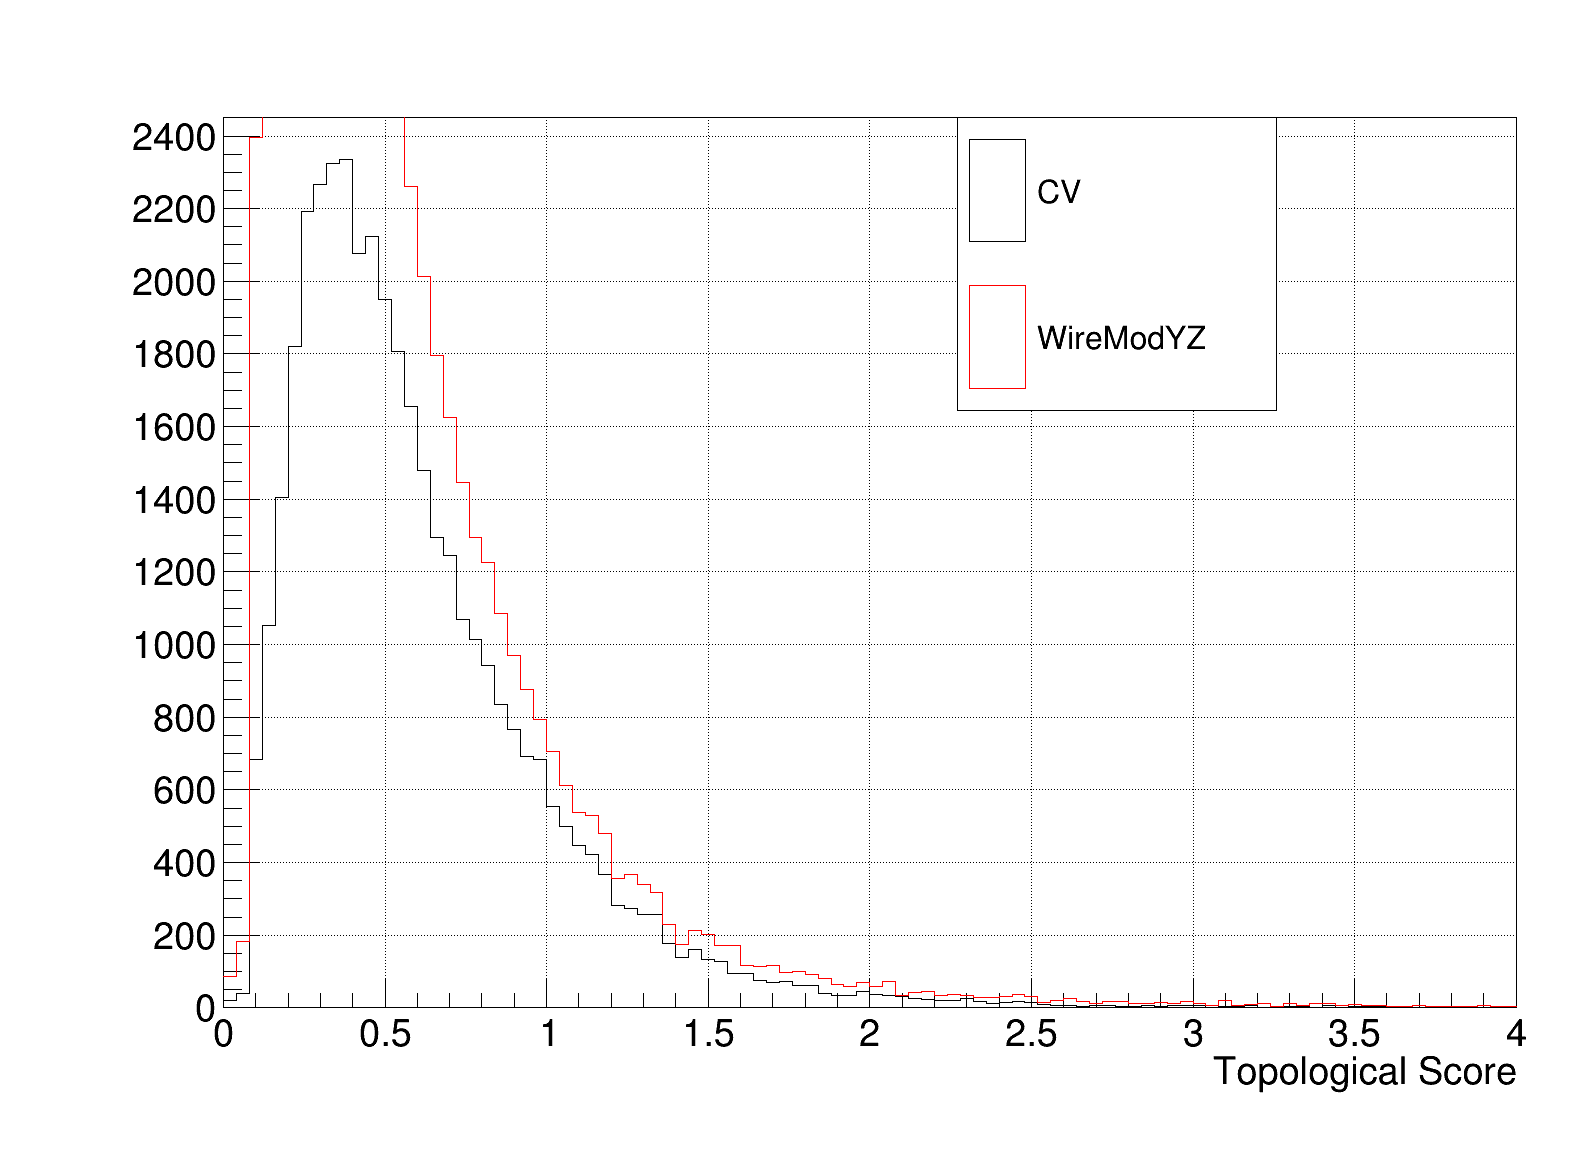

In [16]:

h_1d = ROOT.TH1F("h_1d",'title',100,0,4)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,4)
overlay_out.Draw('TrackMomMCS_mom>>h_1d','','')
detsys_out.Draw('TrackMomMCS_mom>>h_1d2','','')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_TrackMom_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_TrackMom_"+sample_name+".root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_TrackMom_WireModYZ_cut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_TrackMom_WireModYZ_cut.root has been created


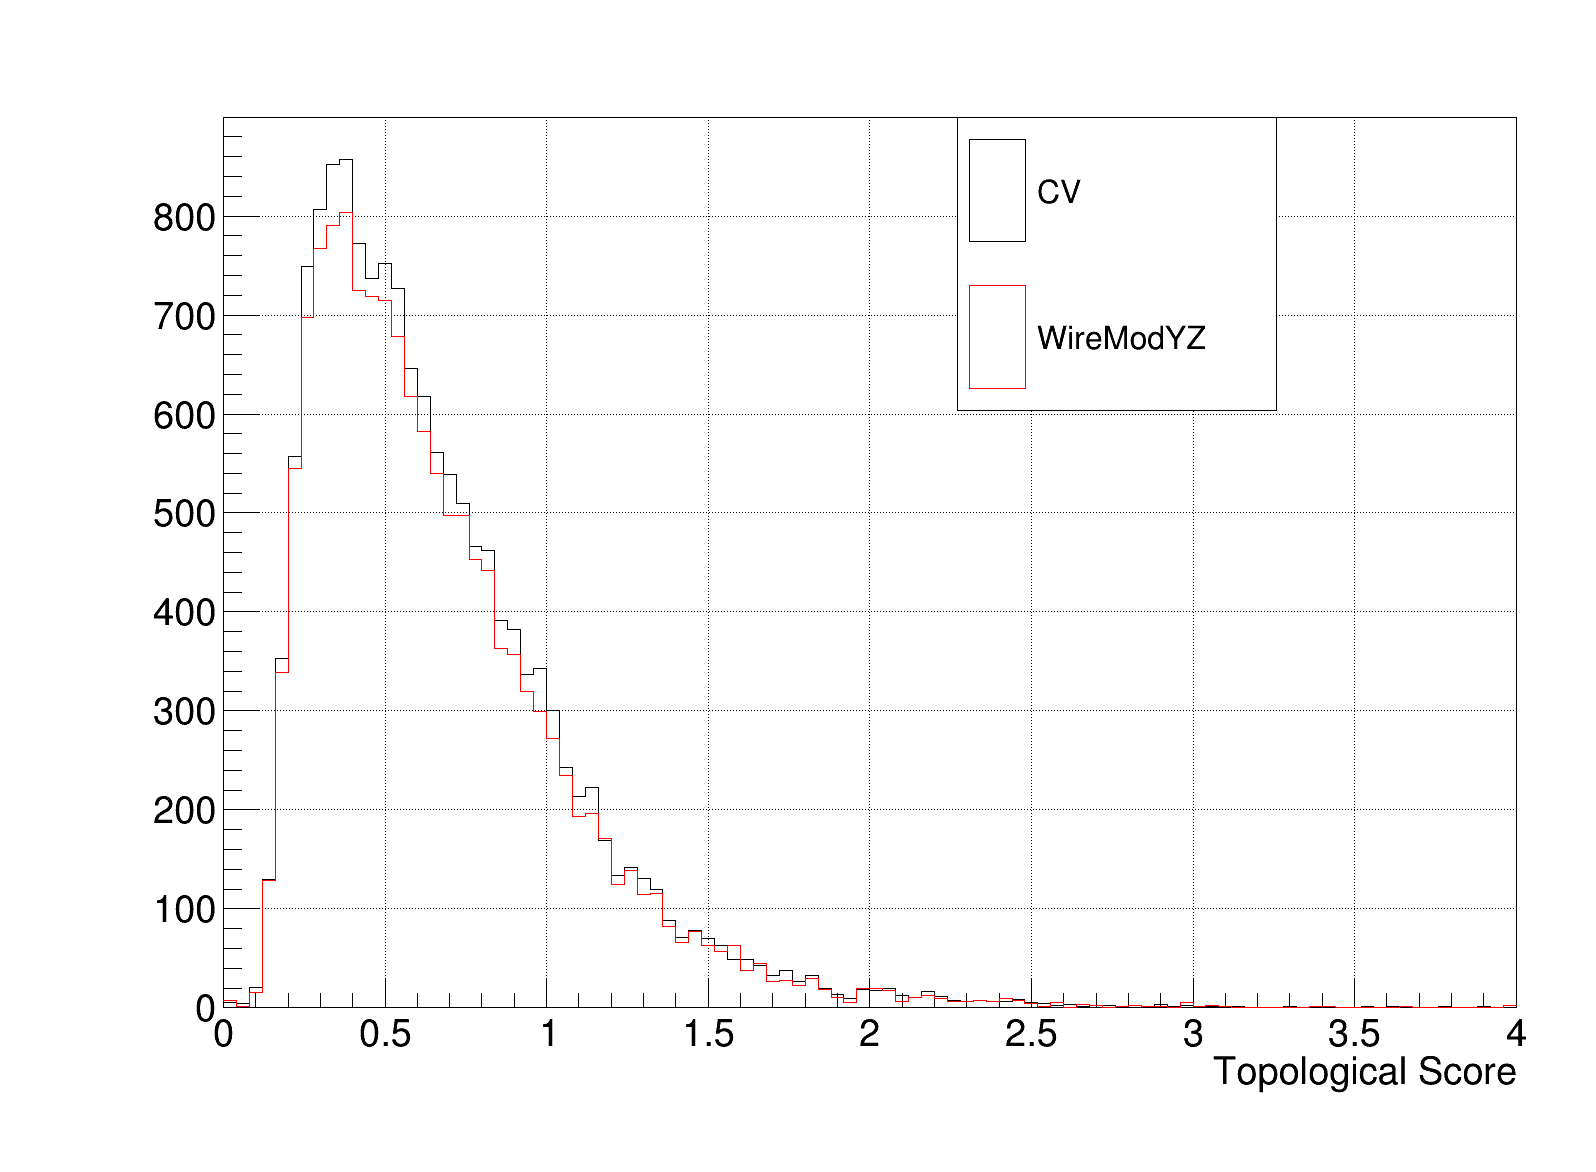

In [17]:

h_1d = ROOT.TH1F("h_1d",'title',100,0,4)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,4)
overlay_out.Draw('TrackMomMCS_mom>>h_1d',cut,'')
detsys_out.Draw('TrackMomMCS_mom>>h_1d2',cut,'')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_TrackMom_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_TrackMom_"+sample_name+"_cut.root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_TrackTheta_WireModYZ.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_TrackTheta_WireModYZ.root has been created


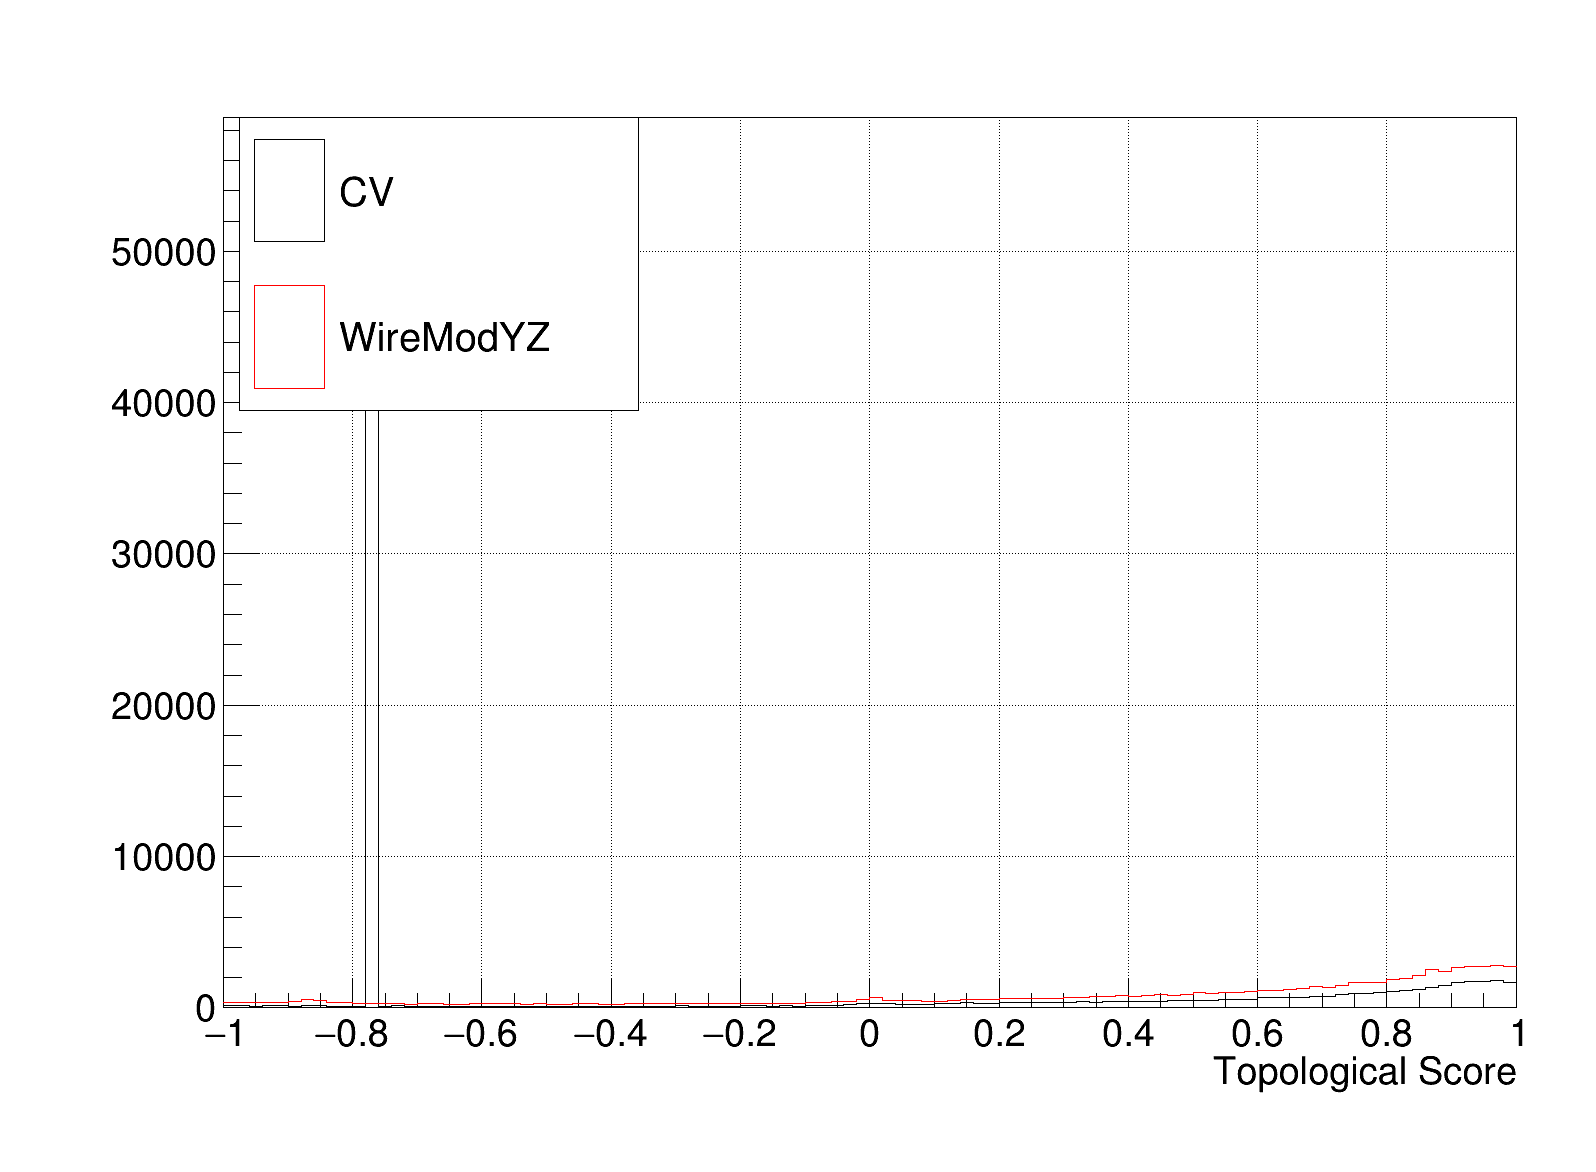

In [18]:

h_1d = ROOT.TH1F("h_1d",'title',100,-1,1)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,-1,1)
overlay_out.Draw('cos(TrackTheta)>>h_1d','','')
detsys_out.Draw('cos(TrackTheta)>>h_1d2','','')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.15,0.65,0.4,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_TrackTheta_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_TrackTheta_"+sample_name+".root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_TrackTheta_WireModYZ_cut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_TrackTheta_WireModYZ_cut.root has been created


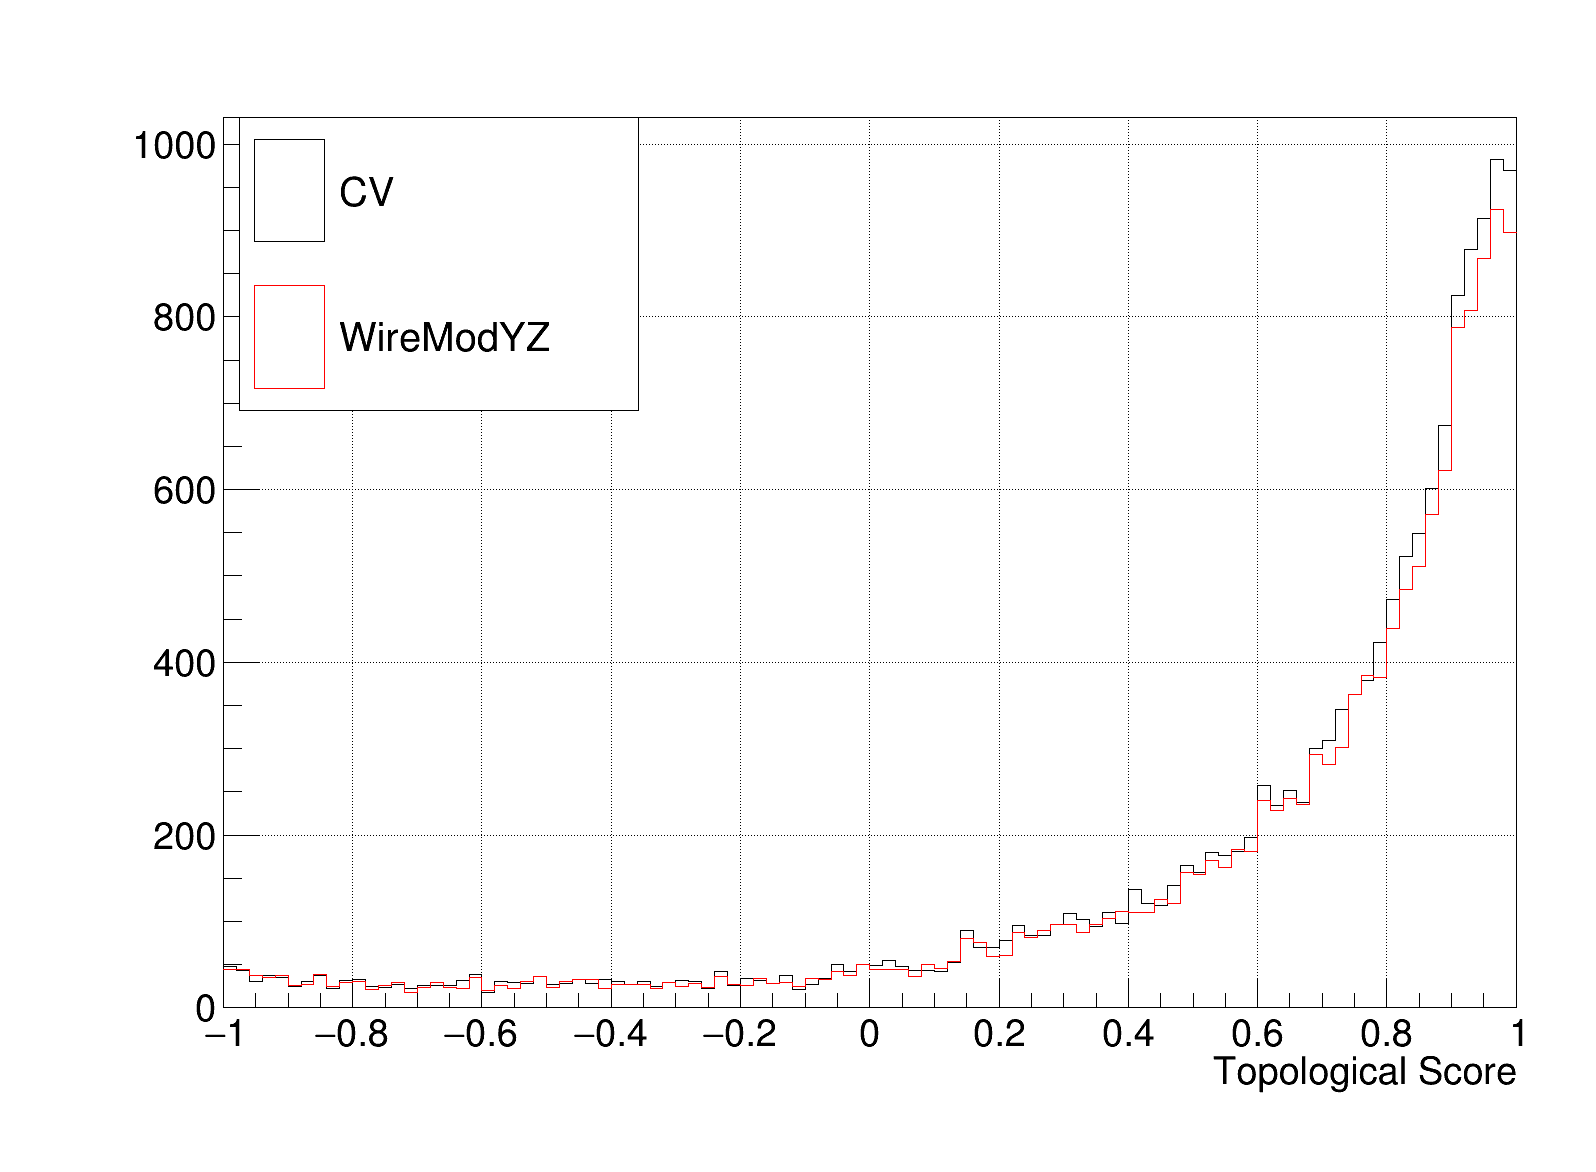

In [19]:

h_1d = ROOT.TH1F("h_1d",'title',100,-1,1)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,-1,1)
overlay_out.Draw('cos(TrackTheta)>>h_1d',cut,'')
detsys_out.Draw('cos(TrackTheta)>>h_1d2',cut,'')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.15,0.65,0.4,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_TrackTheta_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_TrackTheta_"+sample_name+"_cut.root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_NuScore_WireModYZ.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_NuScore_WireModYZ.root has been created


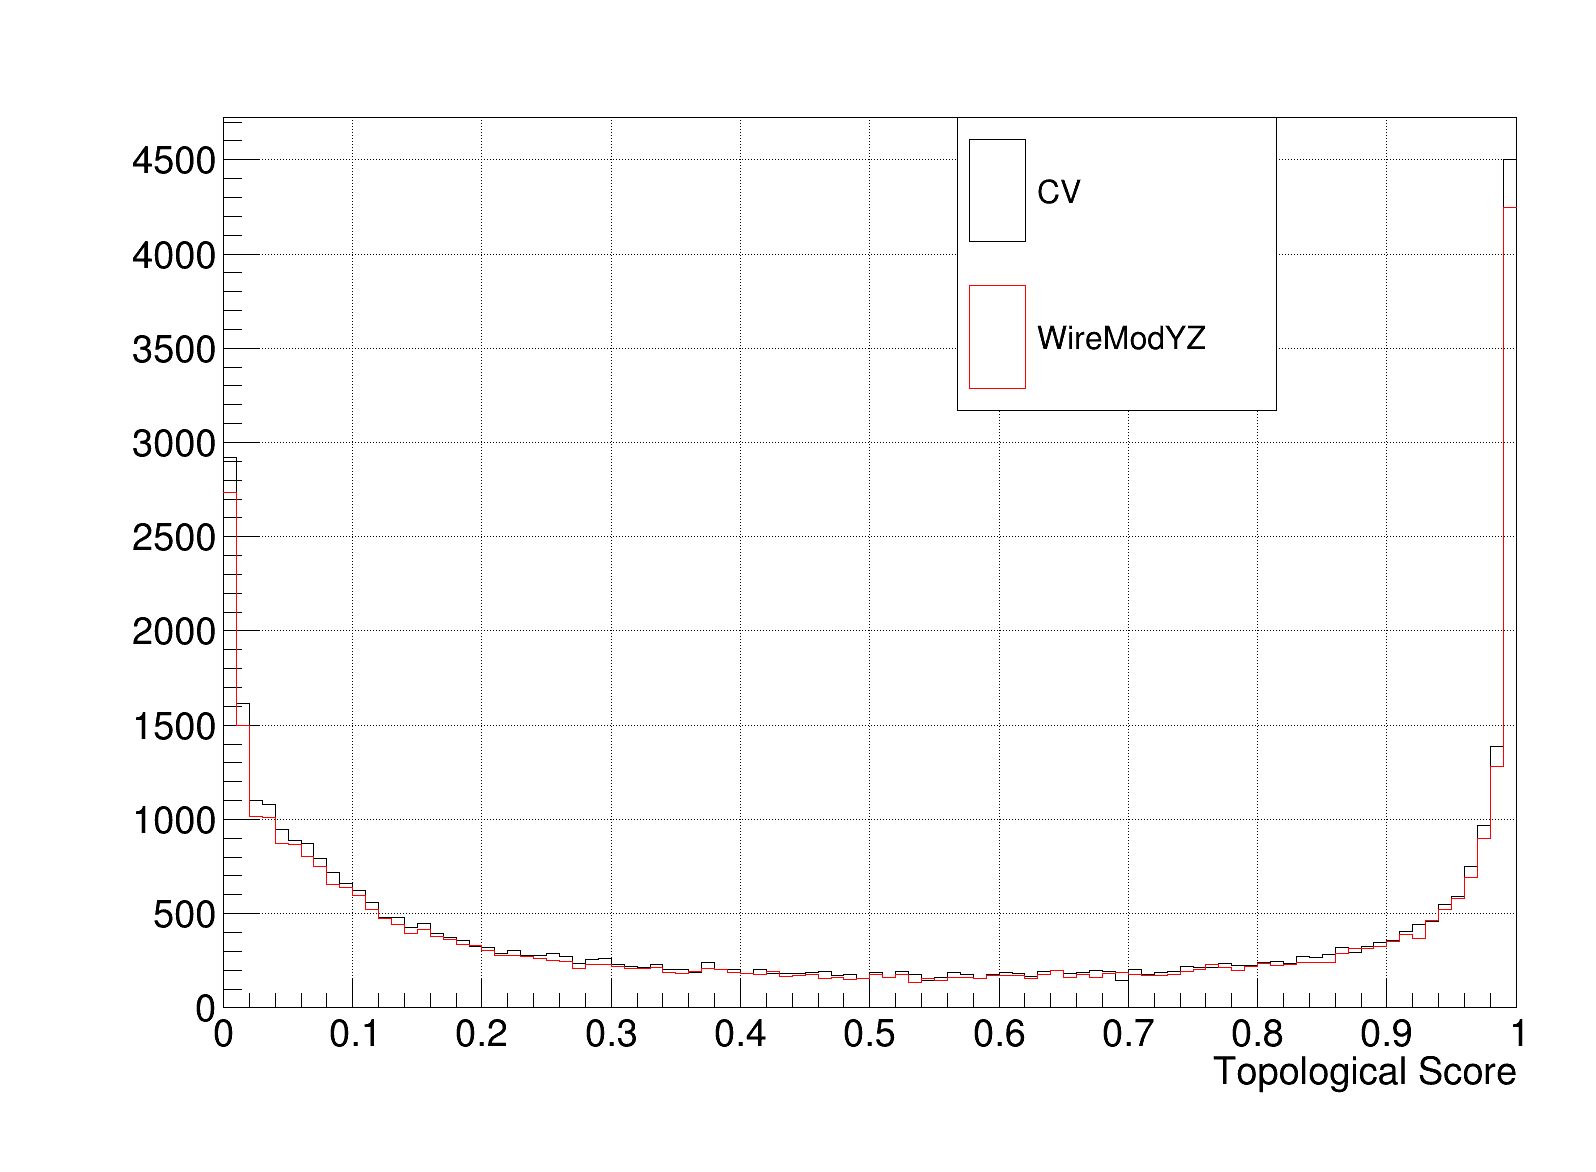

In [20]:

h_1d = ROOT.TH1F("h_1d",'title',100,0,1)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,1)
overlay_out.Draw('NuScore>>h_1d','','')
detsys_out.Draw('NuScore>>h_1d2','','')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_NuScore_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_NuScore_"+sample_name+".root")

In [ ]:

h_1d = ROOT.TH1F("h_1d",'title',100,0,1)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,1)
overlay_out.Draw('NuScore>>h_1d',cut,'')
detsys_out.Draw('NuScore>>h_1d2',cut,'')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Topological Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_NuScore_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_NuScore_"+sample_name+"_cut.root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashScore_WireModYZ.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashScore_WireModYZ.root has been created


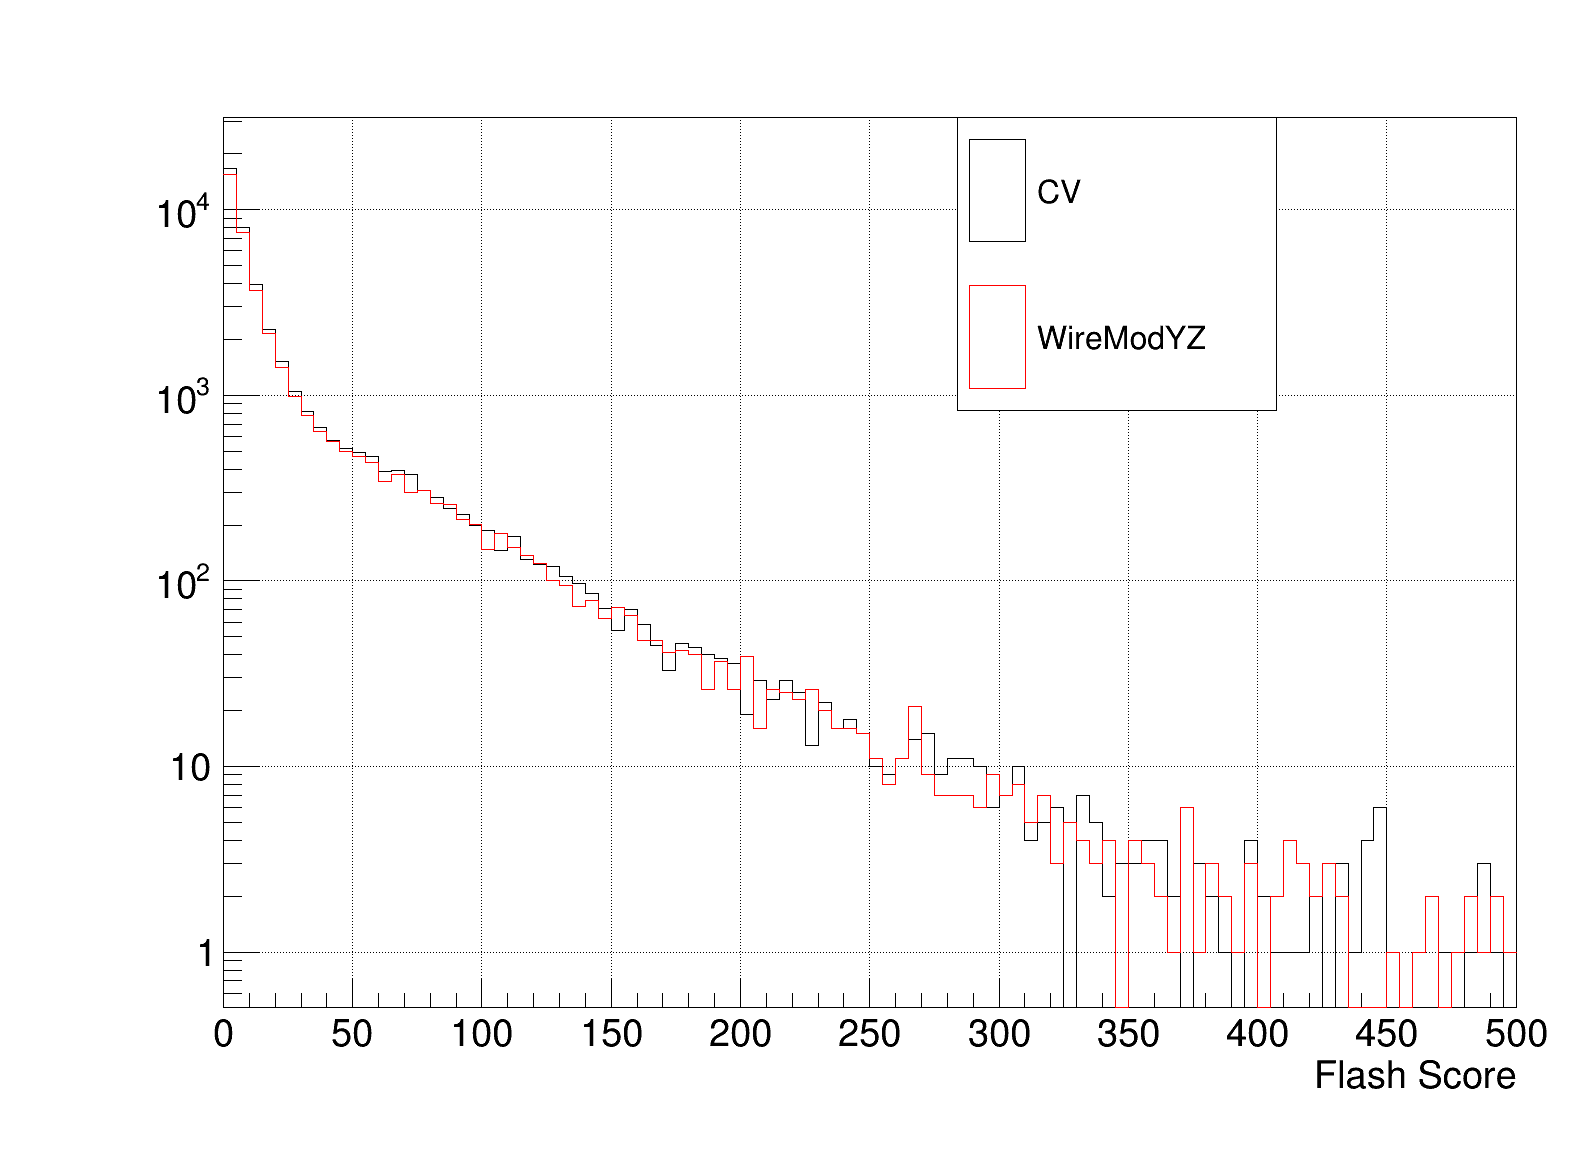

In [21]:

h_1d = ROOT.TH1F("h_1d",'title',100,0,500)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,500)
overlay_out.Draw('FlashScore>>h_1d','','')
detsys_out.Draw('FlashScore>>h_1d2','','')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Flash Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(1)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashScore_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_flashScore_"+sample_name+".root")

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashScore_WireModYZ_cut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashScore_WireModYZ_cut.root has been created


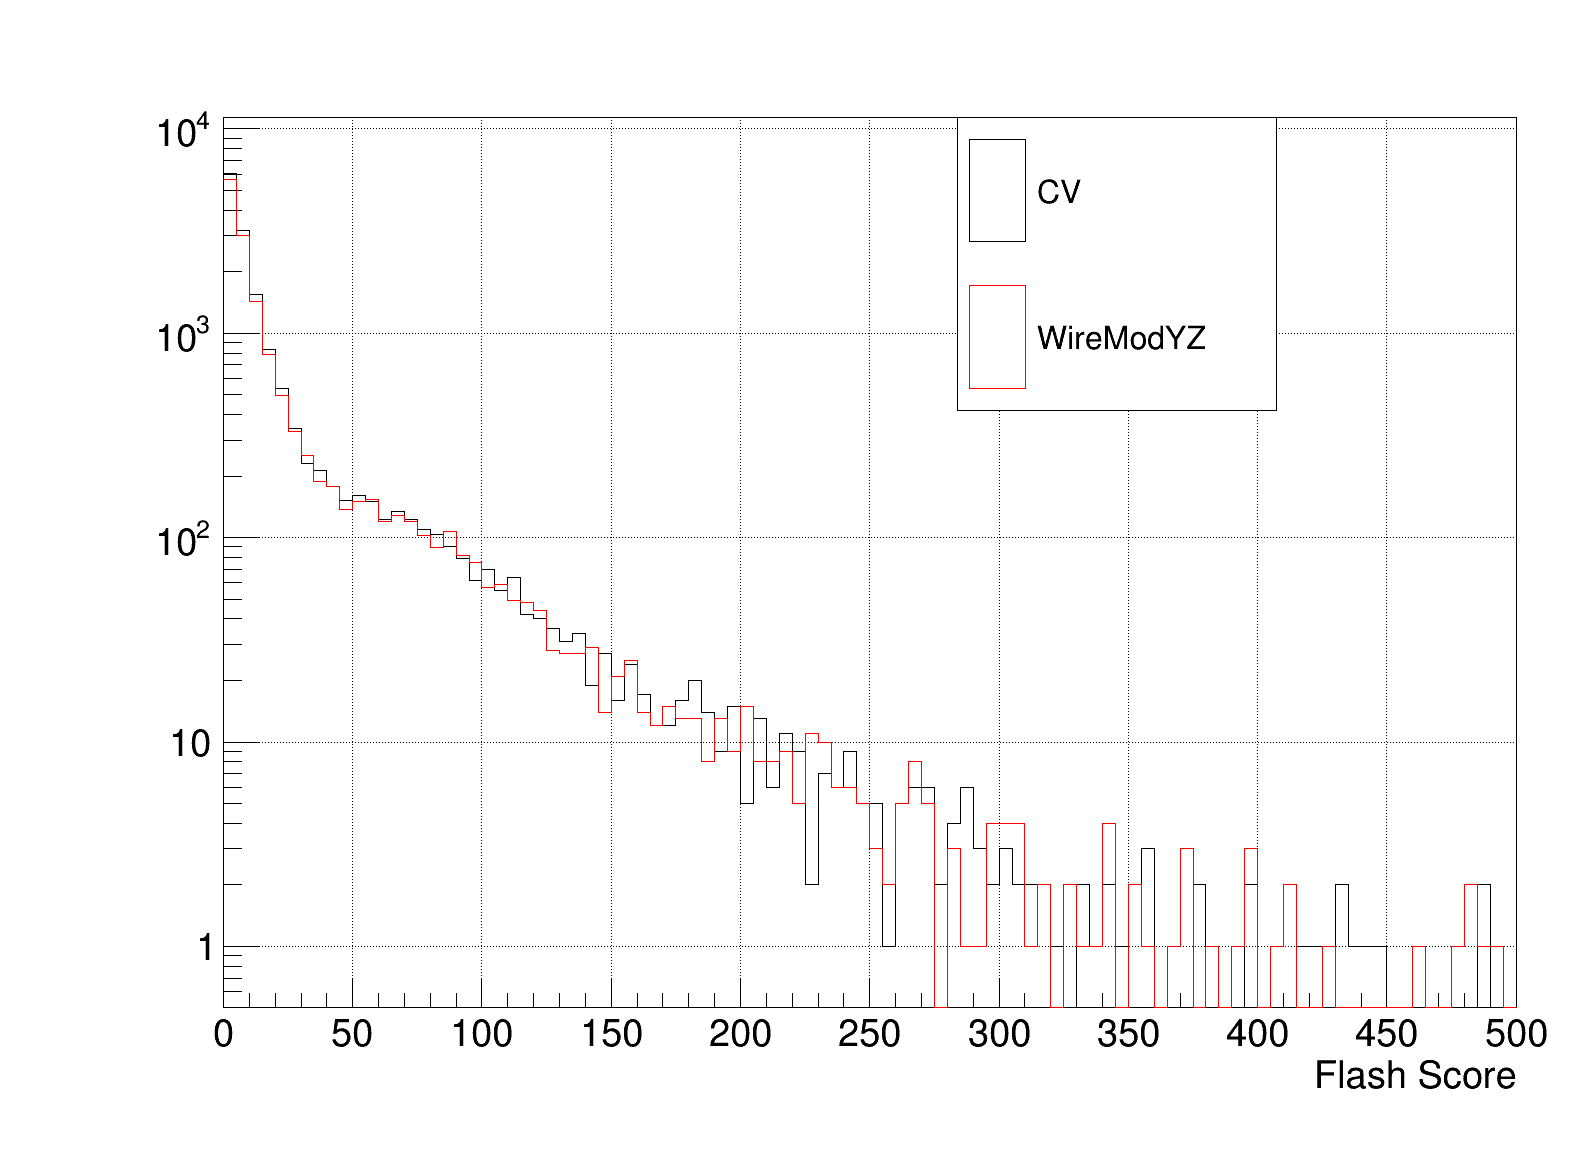

In [22]:
h_1d = ROOT.TH1F("h_1d",'title',100,0,500)
h_1d2 = ROOT.TH1F("h_1d2",'title',100,0,500)
overlay_out.Draw('FlashScore>>h_1d',cut,'')
detsys_out.Draw('FlashScore>>h_1d2',cut,'')

h_1d.SetLineColor(ROOT.kBlack)
h_1d2.SetLineColor(ROOT.kRed)
h_1d.SetXTitle('Flash Score')
h_1d.Draw('')
h_1d2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_1d,'CV',"f");
legend.AddEntry(h_1d2,sample_name,"f");
legend.Draw()
c1.SetLogy(1)
c1.Draw()
#h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashScore_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_flashScore_"+sample_name+"_cut.root")

# stop

Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashPE_WireModYZ_prof_true.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashPE_WireModYZ_prof_treu.root has been created


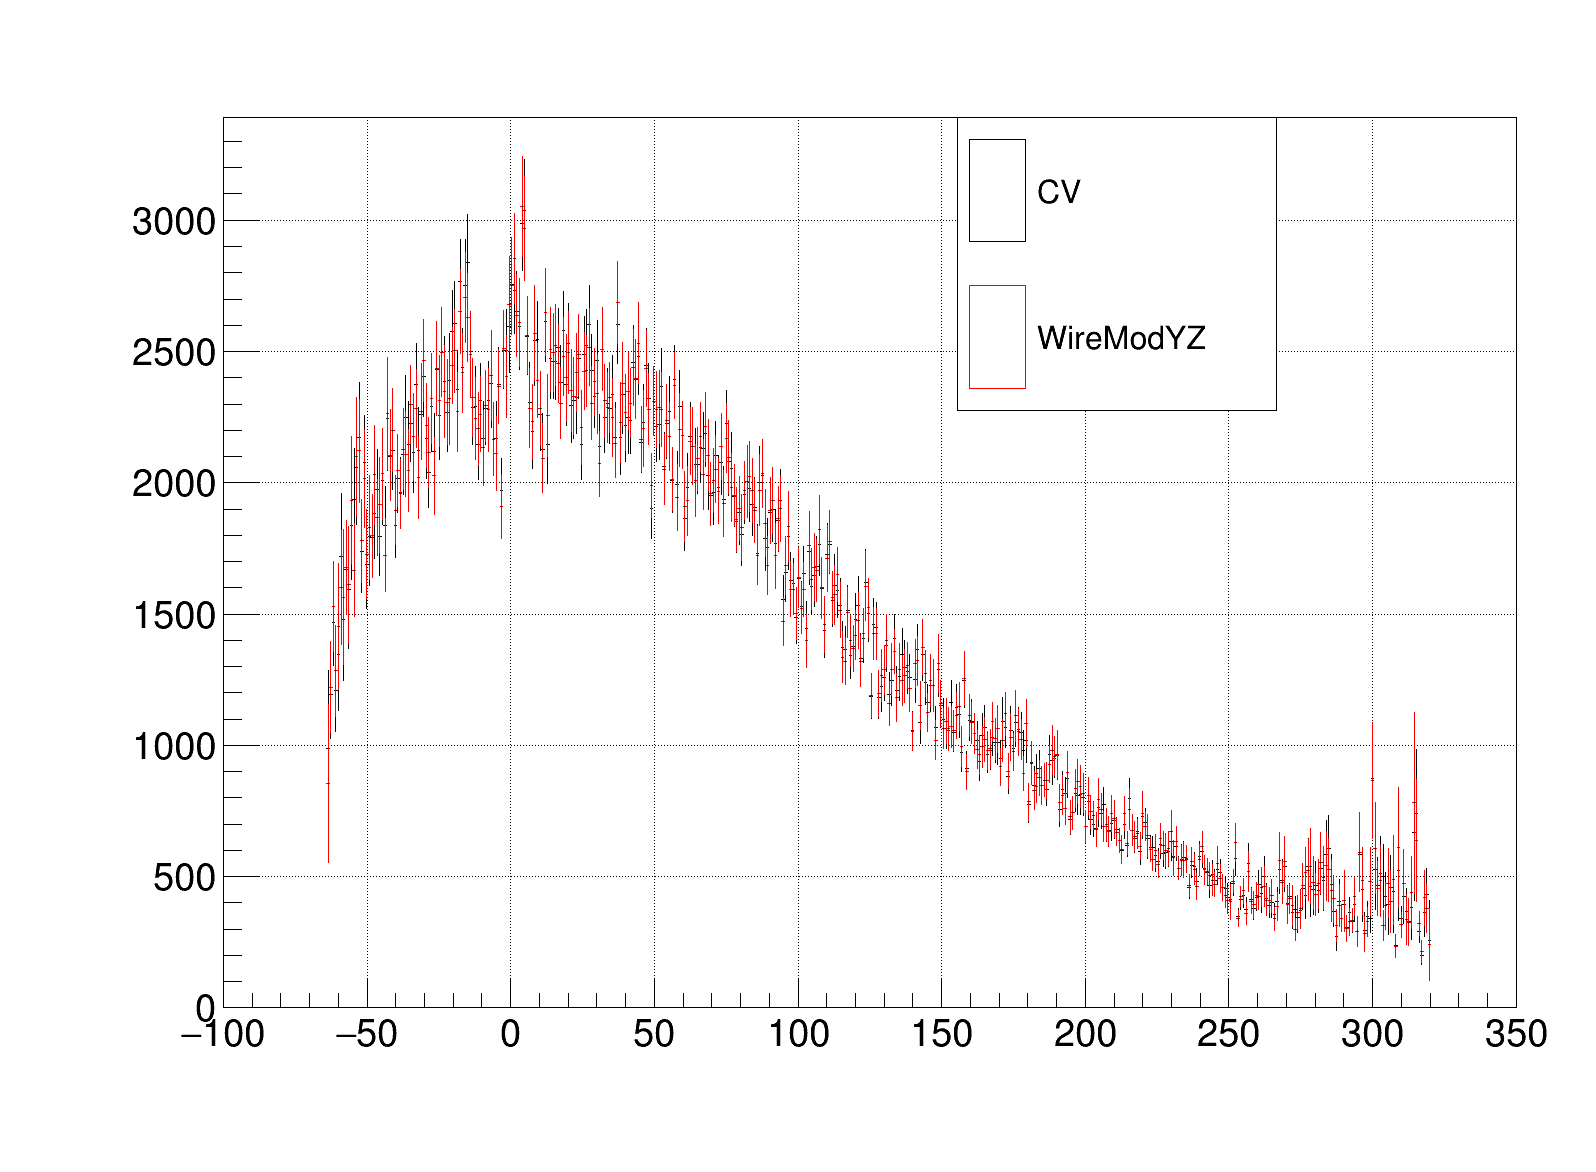

In [23]:

h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_2d_2 = ROOT.TH2F("h_2d_2",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
overlay_out.Draw('flash_PE:MCNu_Vx>>h_2d','','')
detsys_out.Draw('flash_PE:MCNu_Vx>>h_2d_2','','')
h_prof = h_2d.ProfileX()
h_prof_2 = h_2d_2.ProfileX()
h_prof.SetLineColor(ROOT.kBlack)
h_prof_2.SetLineColor(ROOT.kRed)
h_prof.Draw('')
h_prof_2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_prof,'CV',"f");
legend.AddEntry(h_prof_2,sample_name,"f");
legend.Draw()
c1.SetLogy(0)
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+"_prof_true.png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+"_prof_treu.root")

Warning in <TFile::Append>: Replacing existing TH1: h_2d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashPE_WireModYZ.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashPE_WireModYZ.root has been created


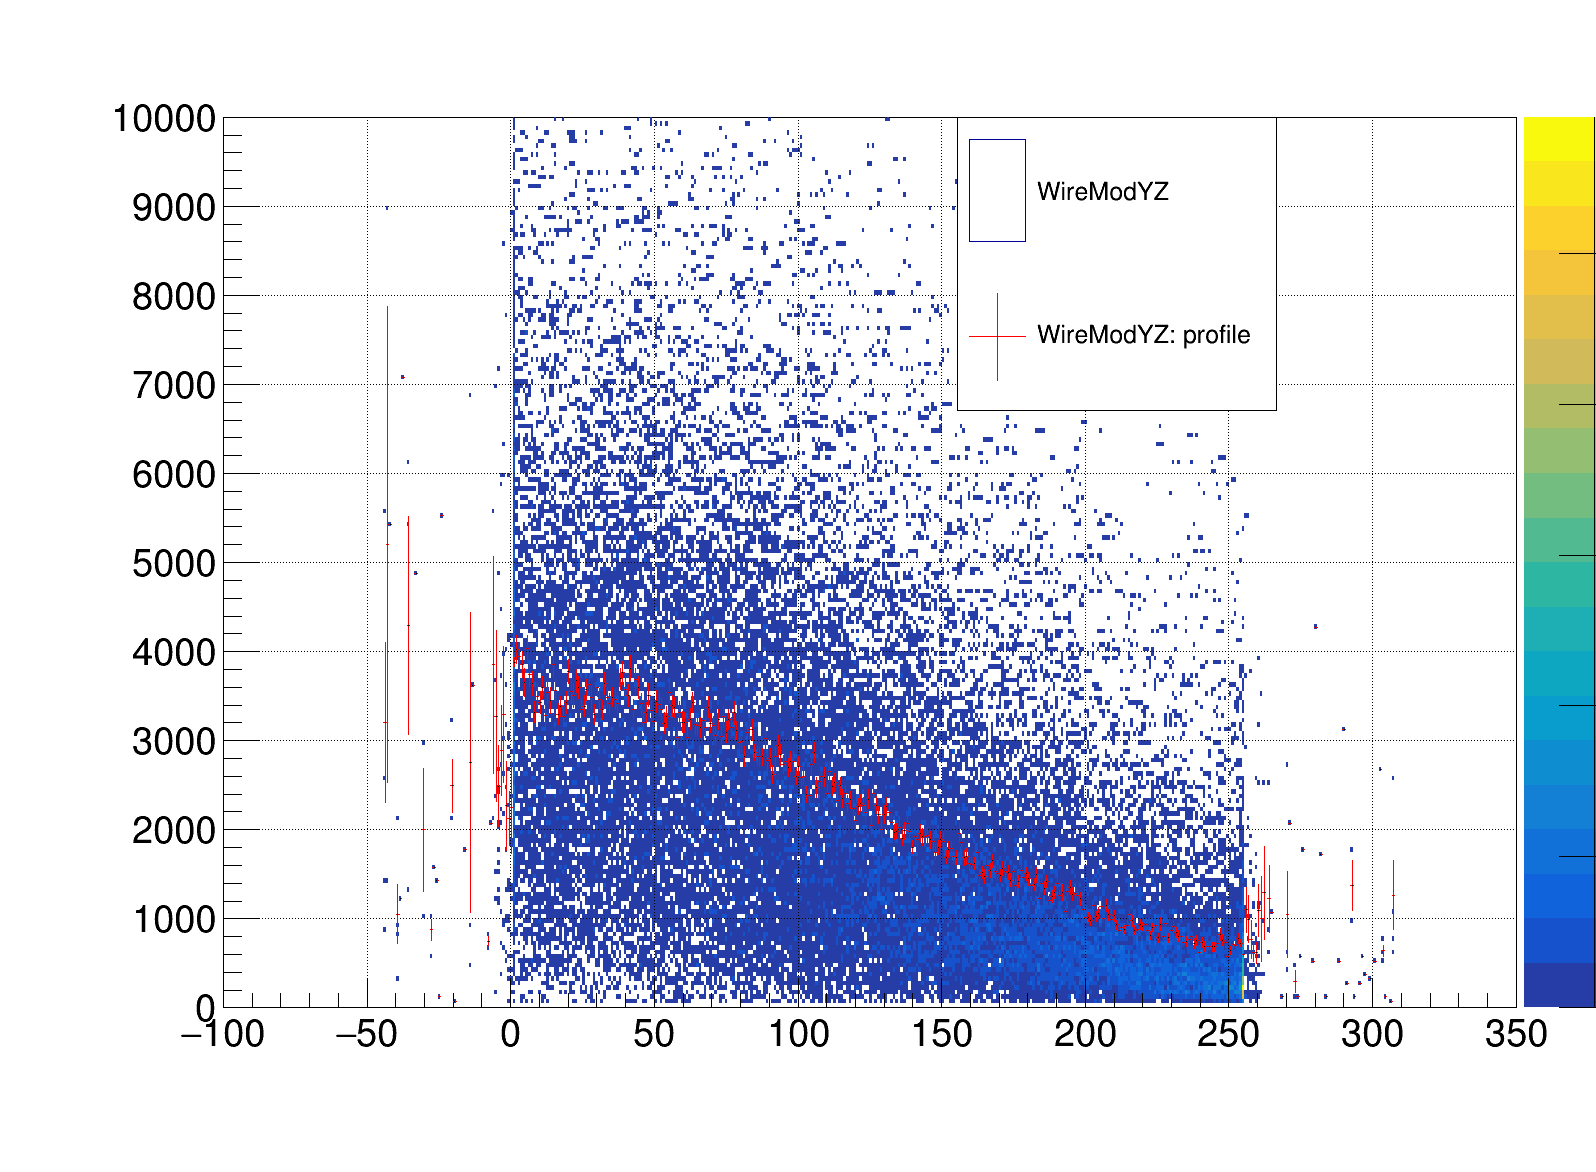

In [24]:

h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
detsys_out.Draw('flash_PE:Vx_sce>>h_2d','','')
#detsys_out.Draw('flash_PE:MCNu_Vx>>h_1d2',cut,'same profz')
h_2d.Draw('colz')
h_prof = h_2d.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
h_prof.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_2d,sample_name,"f");
legend.AddEntry(h_prof,sample_name+': profile',"lep");
legend.Draw()
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+".root")

Warning in <TFile::Append>: Replacing existing TH1: h_2d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashPE_WireModYZ_cut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashPE_WireModYZ_cut.root has been created


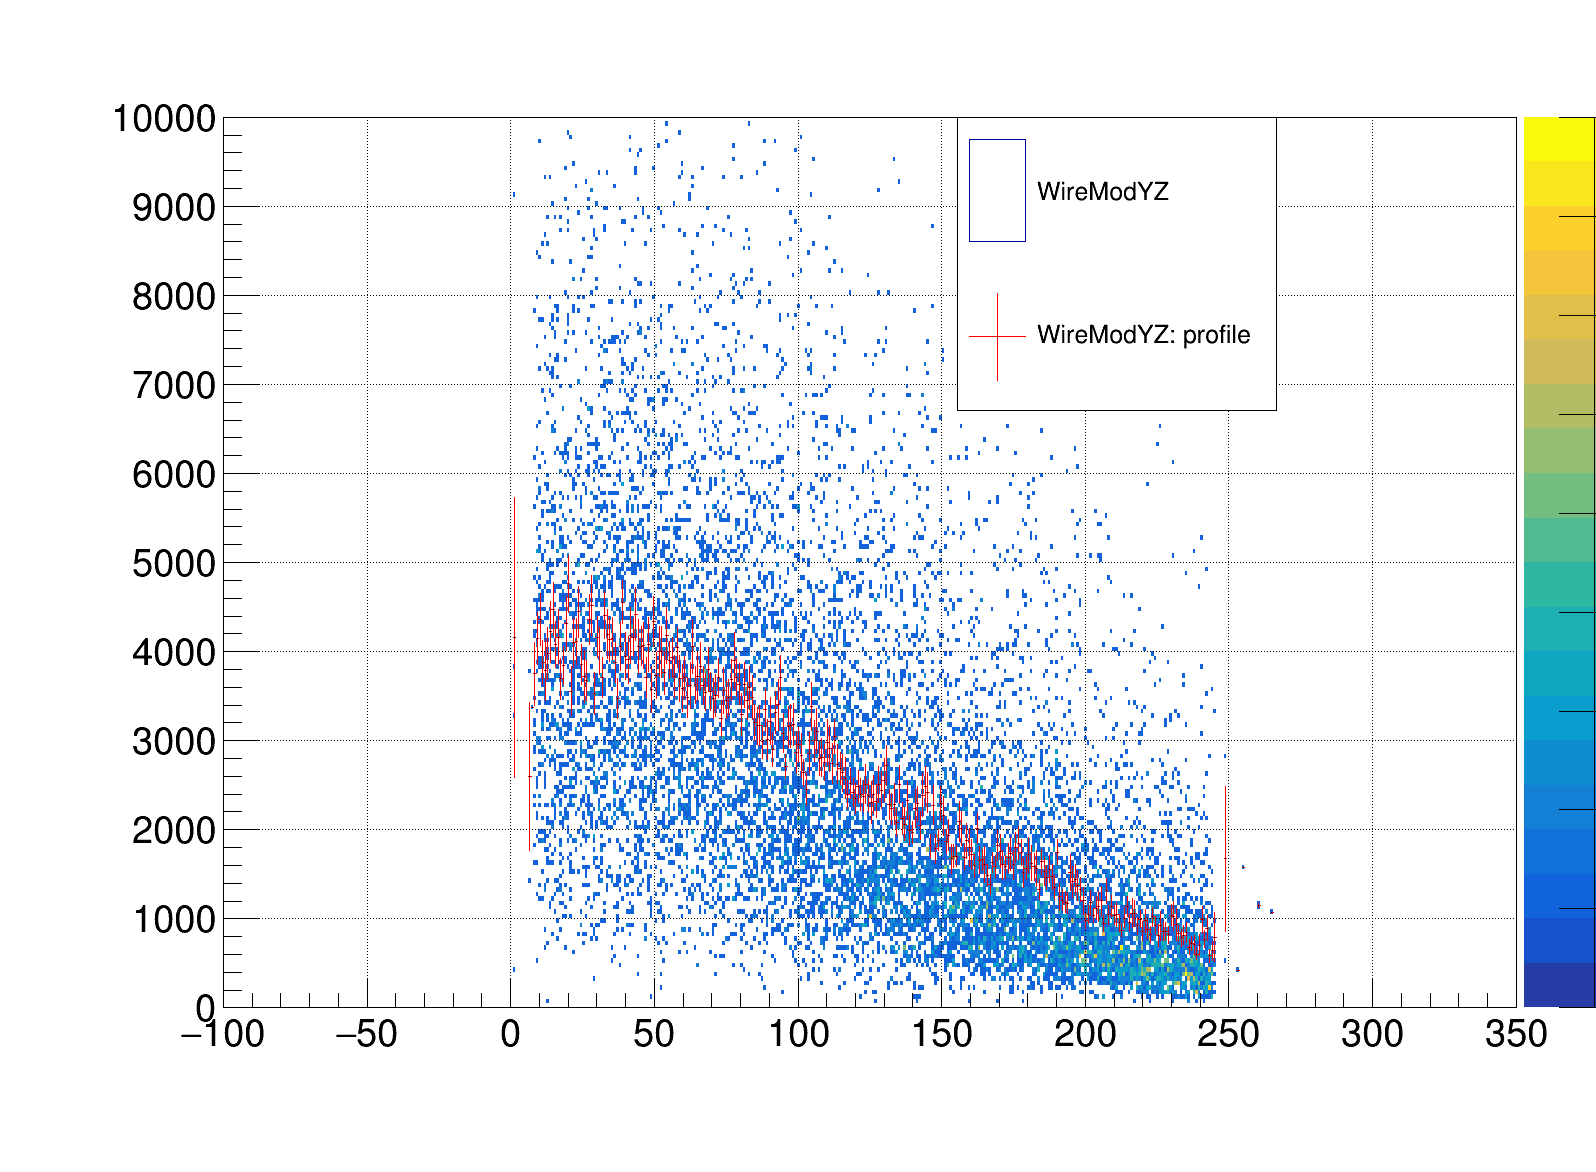

In [25]:

h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
detsys_out.Draw('flash_PE:Vx_sce>>h_2d',cut,'')
#detsys_out.Draw('flash_PE:MCNu_Vx>>h_1d2',cut,'same profz')
h_2d.Draw('colz')
h_prof = h_2d.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
h_prof.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_2d,sample_name,"f");
legend.AddEntry(h_prof,sample_name+': profile',"lep");
legend.Draw()
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+"_cut.root")

Warning in <TFile::Append>: Replacing existing TH1: h_2d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_2d_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_1d2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_flashPE_WireModYZ_prof_cut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_flashPE_WireModYZ_prof_cut.root has been created


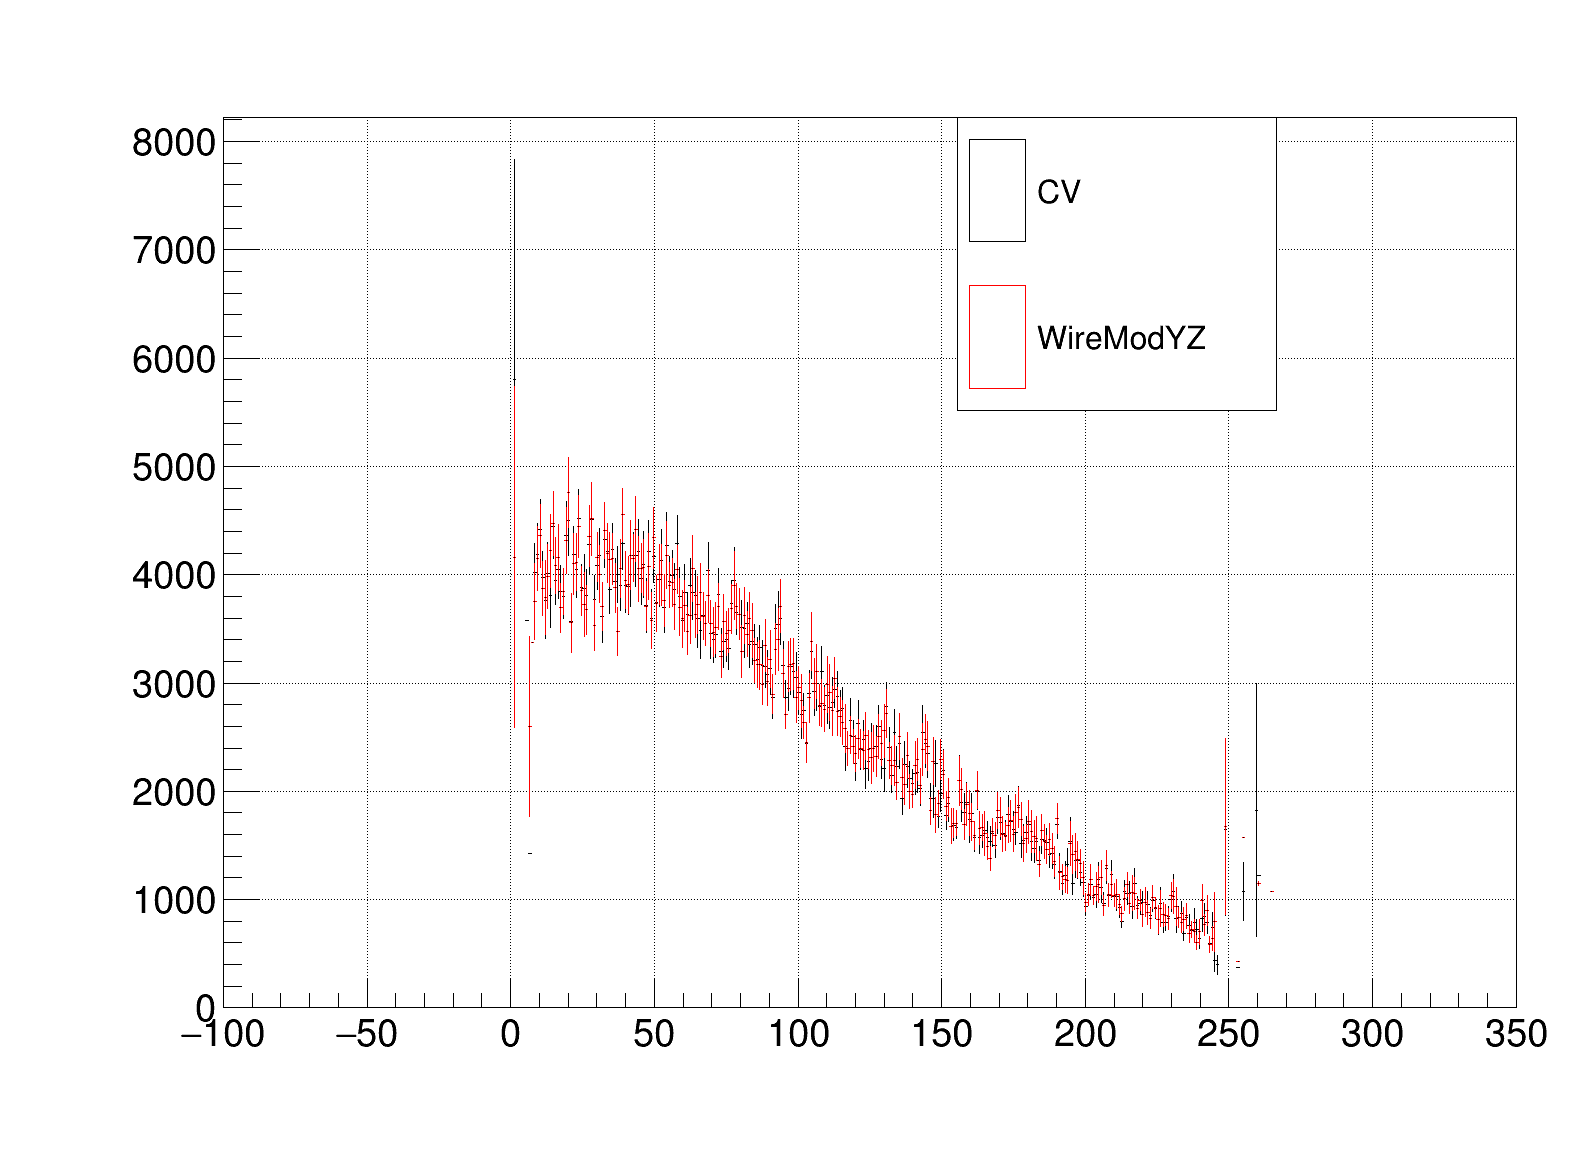

In [26]:

h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_2d_2 = ROOT.TH2F("h_2d_2",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
overlay_out.Draw('flash_PE:Vx_sce>>h_2d',cut,'')
detsys_out.Draw('flash_PE:Vx_sce>>h_2d_2',cut,'')
h_prof = h_2d.ProfileX()
h_prof_2 = h_2d_2.ProfileX()
h_prof.SetLineColor(ROOT.kBlack)
h_prof_2.SetLineColor(ROOT.kRed)
h_prof.Draw('')
h_prof_2.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_prof,'CV',"f");
legend.AddEntry(h_prof_2,sample_name,"f");
legend.Draw()

c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+"_prof_cut.png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+"_prof_cut.root")

Warning in <TFile::Append>: Replacing existing TH1: h_2d (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//png/h_out_of_fidVol.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check//root/h_out_of_fidVol.root has been created


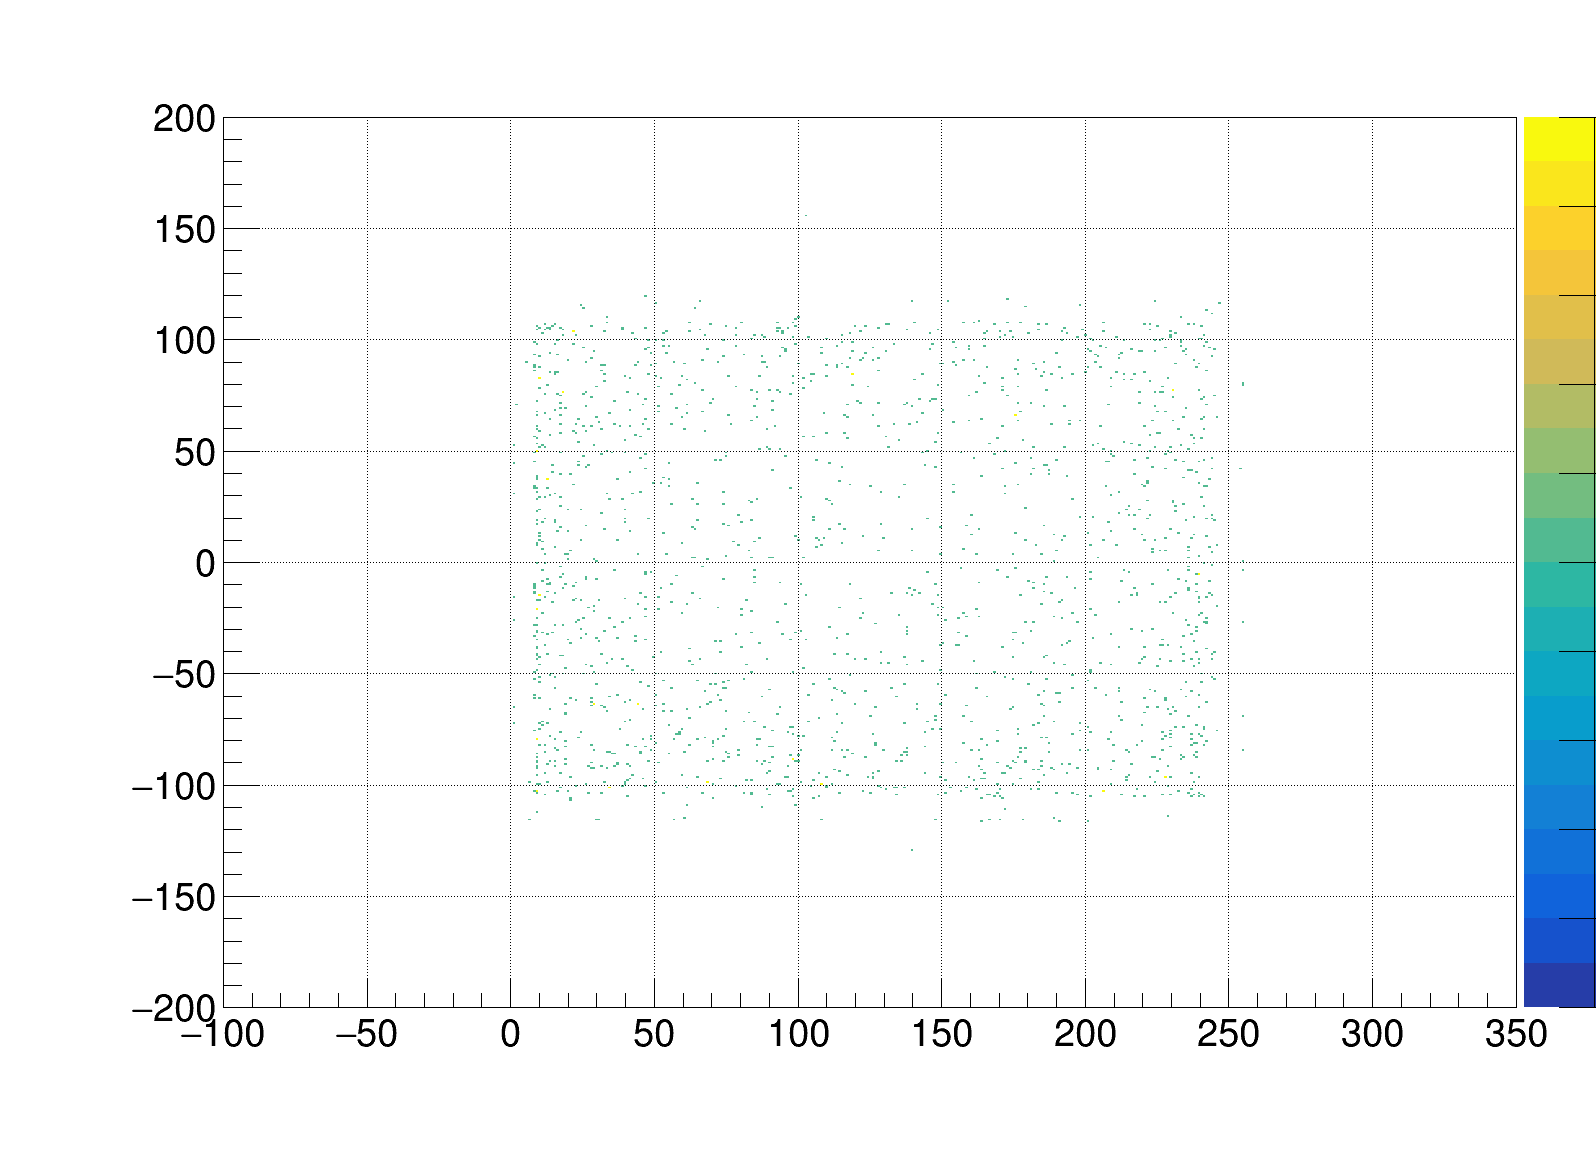

In [27]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,500,-200,200)
overlay_out.Draw('Vy_sce:Vx_sce>>h_2d','numu_ov && MCTrackPurity>0.5','')
h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_out_of_fidVol.png")
c1.SaveAs(outputdir_root + "h_out_of_fidVol.root")

In [ ]:
sample_name = 'CV'
h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
overlay_out.Draw('flash_PE:MCNu_Vx>>h_2d','','')
#detsys_out.Draw('flash_PE:MCNu_Vx>>h_1d2',cut,'same profz')
h_2d.Draw('colz')
h_prof = h_2d.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
h_prof.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_2d,sample_name,"f");
legend.AddEntry(h_prof,sample_name+': profile',"lep");
legend.Draw()
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+".png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+".root")

In [ ]:

h_2d = ROOT.TH2F("h_2d",'title',500,-100,350,200,0,10000)
h_1d = ROOT.TH1F("h_1d",'title',500,-100,350)
h_1d2 = ROOT.TH1F("h_1d2",'title',500,-100,350)
overlay_out.Draw('flash_PE:MCNu_Vx>>h_2d',cut,'')
#detsys_out.Draw('flash_PE:MCNu_Vx>>h_1d2',cut,'same profz')
h_2d.Draw('colz')
h_prof = h_2d.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
h_prof.Draw('same')
legend = ROOT.TLegend(0.6,0.65,0.8,0.9)
legend.AddEntry(h_2d,sample_name,"f");
legend.AddEntry(h_prof,sample_name+': profile',"lep");
legend.Draw()
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_flashPE_"+sample_name+"_cut.png")
c1.SaveAs(outputdir_root + "h_flashPE_"+sample_name+"_cut.root")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_muon_cut_CV'
side_right = 'right'
side_left = 'left'
start = time.time()
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,40,'NuVx_sce'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,40,'NuVy_sce'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,40,'NuVz_sce'+name,side_left)
end = time.time()
print(end - start)

In [ ]:
RootFile.Close()